In [1]:
#Load necessary packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(ggplot2)
library("gridExtra")


‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 1.3.1 ‚îÄ‚îÄ

‚úî ggplot2 3.3.6     ‚úî purrr   0.3.4
‚úî tibble  3.1.7     ‚úî dplyr   1.0.9
‚úî tidyr   1.2.0     ‚úî stringr 1.4.0
‚úî readr   2.1.2     ‚úî forcats 0.5.1

‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()


Attaching package: ‚Äòtestthat‚Äô


The following object is masked from ‚Äòpackage:dplyr‚Äô:

    matches


The following object is masked from ‚Äòpackage:purrr‚Äô:

    is_null


The following objects are masked from ‚Äòpackage:readr‚Äô:

    edition_get, local_edition


The following object is masked from ‚Äòpackage:tidyr‚Äô:

    matches


‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

In [2]:
# Read the data from 2017 matches
matches_2017 <- read_csv(url('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv'))

#Read the data from 2018 matches
matches_2018 <- read_csv(url('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv'))

#Combine the 2017 and 2018 datasets
matches_17_18 <- rbind(matches_2017, matches_2018)


#select relevant predictors and seperate into winner/loser datasets

matches_winner<-matches_17_18|>
select(winner_ht,winner_age, w_ace, winner_rank,w_df,w_svpt,w_1stWon,w_2ndWon,
       w_SvGms,w_df)


matches_loser<-matches_17_18|>
select(loser_ht,loser_age, l_ace, loser_rank,l_df,l_svpt,l_1stWon,l_2ndWon,l_SvGms,)


#combine winner/loser datasets
colnames(matches_winner) <- c( "height","age","aces","rank","double_faults",
                             "serve_points","first_serve_points","second_serve_points","serve_games")
colnames(matches_loser) <- c( "height","age","aces","rank","double_faults",
                             "serve_points","first_serve_points","second_serve_points","serve_games")
#combine winner/loser datasets
matches<-rbind(matches_loser,matches_winner)|>

#mutate aces to be factor
mutate(aces=as.factor(aces))|>
#omit missing values
na.omit()



 matches




Rows: 2911 Columns: 49
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

‚Ñπ Use `spec()` to retrieve the full column specification for this data.
‚Ñπ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2897 Columns: 49
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

‚Ñπ Use `spec()` to retrieve the full column speci

height age  aces rank double_faults serve_points first_serve_points
1     170    21.2 0    100  1              82          33                
2     185    20.4 11   141  3             113          39                
3     183    32.0 1     25  4              76          29                
4     193    33.6 10    34  2              58          27                
5     183    20.7 1    160  6              74          23                
6     193    24.1 5     26  8              74          29                
7     188    27.0 2     33  3              57          21                
8     185    36.6 9     54  8              94          29                
9     188    25.7 9     78  5              87          33                
10    180    28.1 2     62  2              53          20                
11    183    17.8 2    351  4              46          14                
12    198    29.2 3     31  7              50          15                
13    193    30.8 5     29  7              71          39                
14    185    22.8 3     15  2              34          15                
15    188    20.2 6    105  4              95          32                
16    175    34.7 2     21  4             103          42                
17    190    34.9 4     39  3              52          27                
18    193    29.2 11   180  1              58          34                
19    190    29.3 2     51  2              38          13                
20    170    24.3 0     52  1              44          17                
21    188    21.9 2     45  2              97          52                
22    183    22.7 1     79  2              47          15                
23    185    23.3 6      8  5              82          29                
24    185    30.5 4      9  0              84          39                
25    183    31.7 9      4  2              61          27                
26    196    26.0 4      3  3              61          24                
27    178    27.0 4      5  0              69          36                
28    180    26.5 2     93  2             127          59                
29    183    18.0 1    225  3              69          35                
30    193    29.2 6    192  4              70          28                
‚ãÆ     ‚ãÆ      ‚ãÆ    ‚ãÆ    ‚ãÆ    ‚ãÆ             ‚ãÆ            ‚ãÆ                 
11221 183    19.7 10   31   3             72           38                
11222 183    19.7 3    31   3             59           30                
11223 196    21.7 5    85   3             80           38                
11224 183    21.5 7    76   1             46           25                
11225 188    20.7 11   40   1             78           39                
11226 193    20.2 5    15   2             80           36                
11227 193    20.2 6    15   3             56           32                
11228 193    20.2 6    15   1             58           33                
11229 183    19.7 10   31   2             86           47                
11230 193    20.2 10   15   1             94           50                
11231 193    20.2 10   15   0             75           40                
11232 188    21.0 10   68   7             86           44                
11233 185    25.1 3     8   2             66           31                
11234 203    32.4 10    6   0             36           23                
11235 203    32.4 13    6   4             72           40                
11236 178    28.8 2     9   4             68           28                
11237 185    37.2 4     3   0             38           19                
11238 185    37.2 3     3   1             50           23                
11239 198    30.1 6     7   3             89           47                
11240 198    21.5 18    5   2             64           41                
11241 198    21.5 8     5   4             84           40                
11242 188    31.4 6     1   1             43           26           

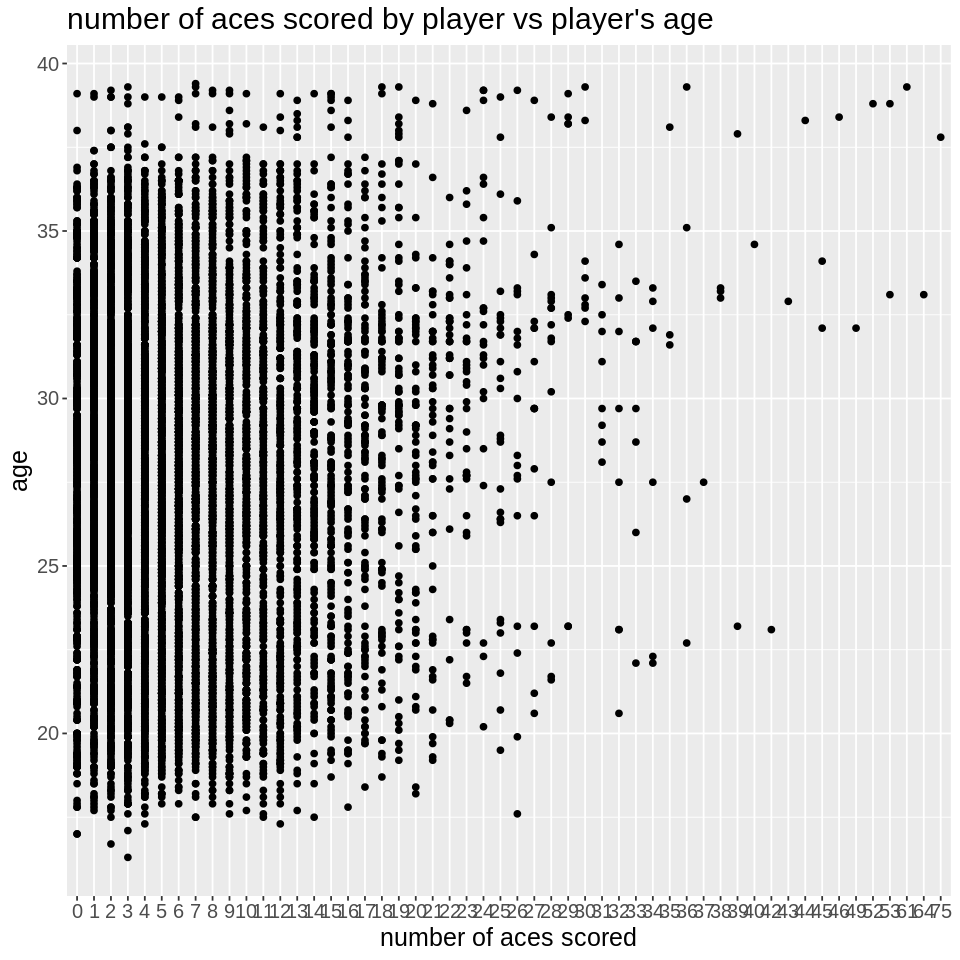

In [3]:
#preliminary exploration of predictors
#age
options(repr.plot.width = 8, repr.plot.height = 8)
  
match_age <- ggplot(matches, aes(x = aces, y =age )) +
  geom_point()+
labs(x="number of aces scored",y="age")+
ggtitle("number of aces scored by player vs player's age")+
  theme(text = element_text(size = 15))
match_age 


 


In [4]:
#split the data into training and testing sets
set.seed(4321) 
match_splt <- initial_split(matches, prop = 3/4
                           , strata = aces)
match_train <- training(match_splt)
match_test <- testing(match_splt)


In [5]:
set.seed(4321) 
#standardize data and create tuning model
tune_recipe<- recipe(aces ~ height+age+rank+double_faults+
                             serve_points+ first_serve_points+second_serve_points+serve_games, data = match_train) |>
step_scale(all_predictors())|>
    step_center(all_predictors())


knn_tune<- nearest_neighbor(weight_func ="rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")



In [ ]:
set.seed(4321) 
#preform 5 fold cross validation
tune_vfold <- vfold_cv(match_train, v = 5, strata = aces)

tune_fit <- workflow() |>
       add_recipe(tune_recipe) |>
       add_model(knn_tune) |>
      tune_grid(resamples = tune_vfold, grid=10)|>
#Collect the metrics from the workflow analysis
collect_metrics()
accuracies<-tune_fit|>
filter(.metric=="accuracy")



In [ ]:
set.seed(4321) 
#Plot the  ùëò  vs the accuracy
options(repr.plot.height = 5, repr.plot.width = 6)

cross_val_plot<-ggplot(accuracies, aes(x=neighbors, y=mean))+
geom_point()+
geom_line()+
labs(x="Neighbors",y="Accuracy estimate")+
theme(text=element_text(size=12))+
ggtitle("K value vs the accuracy of the estimate")

cross_val_plot

Based on the graph above, k= has the highest accuracy estimate. Therefor our model will use k=

In [ ]:
set.seed(4321) 
#build classification model
tune_recipe<- recipe(aces ~ height+age+rank+double_faults+
                             serve_points+ first_serve_points+second_serve_points+serve_games, data = match_train) |>
step_scale(all_predictors())|>
    step_center(all_predictors())


match_tune<- nearest_neighbor(weight_func ="rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")

match_fit <- workflow() |>
      add_recipe(match_recipe) |>
       add_model(knn_spec) |>
fit(data = match_train)

#predict responding variable on test set
match_pred<- predict(match_train,match_test) |>
      bind_cols(match_test)

#report accuracy of prediction
match_metrics<- match_pred|>
    metrics(truth=aces, estimate= .pred_class)|>
    filter(.metric== "accuracy")

#report confusion matrix
match_conf_mat<-match_pred|>
    conf_mat(truth=aces, estimate=.pred_class)
mnist_predictions
mnist_metrics
mnist_conf_mat








